# Liquidity Sensitive Automated Market Maker

## Motivation

LMSR(Logarithmic Market Scoring Rule)

- Widely used by a number of Prediction Markets.
- Liquidity is good for traders but comes at the cost of increasing the market maker's worst-case loss
- An LMSR operator can expect to lose money in proportion to the liquidity it provides

-> We need **new market maker algorithm**!

**Liquidity Sensitive Automated Market Maker**

- Automatically adjusts how easily prices change according to how much activity it sees
    - prices bocome less elastic as more dollars flow in
- ensure an arbitrarily small loss in the worst case and a positive profit over a wide range of final states
- prices can sum to greater than $1
- an explicit, easy-to-calculate functional form

## Preliminaly

- $\mathbf{q}$ : vector of sequlity quantities
- $p_i(\cdot)$ : price of sequlity $i$

**Definition(Path Independence)**

Pricing rule $\mathbf{p}$ is *path independence* if the value of line integral between any two quantity vectors depends only on those quantity vectors, and not on the path between them.

**Definition(Translation Invariance)**

A pricing rule is *translation invariant* if prices always sum to unity. Formally:
$$
    \sum_i p_i(\mathbf{q}) = 1
$$

**Definition(Liquidity Sensitivity)**

Define the $n$-dimensional vector  $\mathbf{1} = (1, \ldots, 1)$. A pricing rule is *liquidity insensitive* if
$$
    p_i(\mathbf{q} + \alpha \mathbf{1}) = p_i(\mathbf{q})
$$
for all valid $\mathbf{q}$ and all $\alpha$

**Theorem**

No pricing rule is translation invariant, path independent, and liquidity sensitive.

## New Market Maker

We relax *Transaction Invariance*.

$$
    \sum_i p_i(\mathbf{q}) \ge 1
$$

-> However, if it costs more than one dollar to acquire a dollar guaranteed payout, a trader could arbitrage the market maker by selling dollar guaranteed payouts to the market maker for more than a dollar.

-> Two ways to get around this problem: **No Selling** and **Covered Short Selling**

### Formulation

**Cost function** can be written as 
$$
    C(\mathbf{q}) = b(\mathbf{q}) \log \left( \sum_i \exp (q_i / b(\mathbf{q})) \right)
$$

If $b(\mathbf{q}) = b$, it becomes LMSR. Let

$$
    b(\mathbf{q}) = \alpha \sum_i q_i
$$
where $\alpha > 0$ is a constant.

The $\alpha$ can be thought of as the commission taken by the market maker.
Higher values of $\alpha$ correspond to larger commissions, which leads to more revenue.
At the same time, setting $\alpha$ too large discourages trade.

Cost function $C(\cdot)$ is nondecreasing in $\alpha$.

**Price function** can be written as
$$
    p_i(\mathbf{q}) = \alpha \log\left( \sum_j \exp(q_j / b(\mathbf{q})) \right) + \frac{\sum_j q_j \exp(q_i/b(\mathbf{q})) - \sum_j q_j \exp(q_j/b(\mathbf{q}))}{\sum_j q_j \sum_j \exp(q_j/b(\mathbf{q}))}
$$

Bounds on the sum of prices is expressed as follows:
$$
    1 + n \left[\alpha \log(\exp(1/\alpha)+n-1) - \frac{\exp(1/\alpha)}{\exp(1/\alpha)+n-1} \right] \le \sum_i p_i(\mathbf{q}) \le 1 + \alpha n \log n
$$

Second inequality becomes tight when $\mathbf{q} = k \mathbf{1}$ for $k > 0$.

# Code

Consider two outcomes $A$ and $B$ case. Then cost function and price function become

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)

## Cost function

In [2]:
def cost_function(qA, qB, a):
    b = a * (qA + qB)
    return b * np.log(np.exp(qA / b) + np.exp(qB / b))

In [3]:
x, y = np.meshgrid(np.linspace(1, 500, 32), np.linspace(1, 500, 32))

In [4]:
a = 0.01
data = [
    go.Surface(
        z=cost_function(x,y,a)
    )
]
layout = go.Layout(
    title='LS-LMSR : Cost Function',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
URL = plotly.offline.iplot(fig, filename='Costfunction-3d-surface.html')

In [5]:
a = 0.05
data = [
    go.Surface(
        z=cost_function(x,y,a)
    )
]
layout = go.Layout(
    title='LS-LMSR : Cost Function',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
URL = plotly.offline.iplot(fig, filename='Costfunction-3d-surface.html')

In [6]:
a = 0.1
data = [
    go.Surface(
        z=cost_function(x,y,a)
    )
]
layout = go.Layout(
    title='LS-LMSR : Cost Function',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
URL = plotly.offline.iplot(fig, filename='Costfunction-3d-surface.html')

In [7]:
a = 0.5
data = [
    go.Surface(
        z=cost_function(x,y,a)
    )
]
layout = go.Layout(
    title='LS-LMSR : Cost Function',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
URL = plotly.offline.iplot(fig, filename='Costfunction-3d-surface.html')

## Price

In [8]:
# Price of A
def price_function(qA, qB, a):
    b = a * (qA + qB)
    first = a * np.log(np.exp(qA/b) + np.exp(qB/b))
    num = (qA * np.exp(qA/b) + qB * np.exp(qA/b)) - (qA * np.exp(qA/b) + qB * np.exp(qB/b))
    den = (qA + qB) * (np.exp(qA/b) + np.exp(qB/b))
    second = num/ den
    return first + second

In [9]:
a = 0.01
data = [
    go.Surface(
        z=price_function(x,y,a)
    )
]
layout = go.Layout(
    title='LS-LMSR : Price of A',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
URL = plotly.offline.iplot(fig, filename='Costfunction-3d-surface.html')

In [10]:
a = 0.05
data = [
    go.Surface(
        z=price_function(x,y,a)
    )
]
layout = go.Layout(
    title='LS-LMSR : Price of A',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
URL = plotly.offline.iplot(fig, filename='Costfunction-3d-surface.html')

In [11]:
a = 0.1
data = [
    go.Surface(
        z=price_function(x,y,a)
    )
]
layout = go.Layout(
    title='LS-LMSR : Price of A',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
URL = plotly.offline.iplot(fig, filename='Costfunction-3d-surface.html')

In [12]:
a = 0.5
data = [
    go.Surface(
        z=price_function(x,y,a)
    )
]
layout = go.Layout(
    title='LS-LMSR : Price of A',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
URL = plotly.offline.iplot(fig, filename='Costfunction-3d-surface.html')

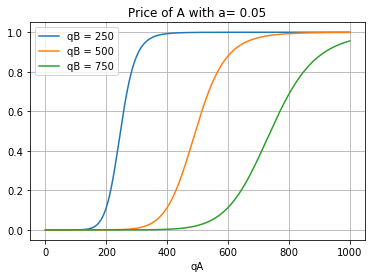

In [13]:
x_grid = np.arange(0, 1000, 0.5)
params = [250, 500, 750]
for p in params:
    price_vals = np.empty_like(x_grid)
    for i, x in enumerate(x_grid):
        price_vals[i] = price_function(x, p, 0.05)
    plt.plot(x_grid, price_vals, label="qB = {}".format(p))
plt.grid()
plt.title("Price of A with a= 0.05")
plt.xlabel("qA")
plt.legend()
plt.show()

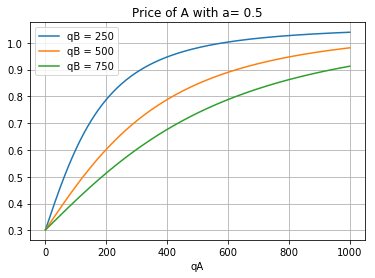

In [14]:
x_grid = np.arange(0, 1000, 0.5)
params = [250, 500, 750]
for p in params:
    price_vals = np.empty_like(x_grid)
    for i, x in enumerate(x_grid):
        price_vals[i] = price_function(x, p, 0.5)
    plt.plot(x_grid, price_vals, label="qB = {}".format(p))
plt.grid()
plt.title("Price of A with a= 0.5")
plt.xlabel("qA")
plt.legend()
plt.show()